# -------------------**EXPLORATORY DATA ANALYSIS**------------------------

## **TOPIC: Crop Yeild Prediction**
**PROBLEM STATEMENT:** Predict crop yield using environmental and agricultural factors from multiple data sources: rainfall, temperature, pesticide usage, and historical yield. The goal is to understand key drivers of yield, clean and merge the datasets into one analytical table, test relationships statistically, and prepare a processed dataset for modeling.

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

In [276]:
pest = pd.read_csv("pesticides.csv");
rain = pd.read_csv("rainfall.csv");
temp = pd.read_csv("temp.csv");
yield_ = pd.read_csv("yield.csv");

In [277]:
df = [pest, rain, temp, yield_];
for i in df:
    print(i.info())
    print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 non-null   int64  
 5   Unit     4349 non-null   object 
 6   Value    4349 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 238.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0    Area                          6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB
None


<class 'pandas.core.f

## **Understanding the Datasets**
#### 1. **pesticides.csv:** Contains annual pesticide usage data by country. Useful for analyzing the impact of chemical inputs on crop yield.
- Domain: The broad category of data, e.g., “Pesticides Use”
- Area: Country name
- Element: Type of measurement (e.g., 'Use')
- Item: What is measured (e.g., 'Pesticides (total)')
- Year: Year of observation
- Unit: Measurement unit (e.g., 'tonnes of active ingredients')
- Value: Amount of pesticide used

#### 2. **rainfall.csv:** Provides average annual rainfall (mm) for each country and year. Key for understanding water availability and its effect on crops.
- Area: Country name
- Year: Year of record
- average_rain_fall_mm_per_year: Average annual rainfall in millimeters

#### 3. **temp.csv:** Records average annual temperature (°C) by country and year. Important for assessing climate effects on crop growth.
- year: Year of record
- country: Country name
- avg_temp: Average annual temperature (°C)

#### 4. **yeild.csv:** Contains crop yield data (e.g., maize) by country, year, and crop type. This is the target variable for prediction.
- Domain Code: Code for data domain
- Domain: Data domain (e.g., 'Crops')
- Area Code: Country code
- Area: Country name
- Element Code: Code for measurement type
- Element: Type of measurement (e.g., 'Yield')
- Item Code: Code for crop
- Item: Crop name (e.g., 'Maize')
- Year Code: Year code
- Year: Year of record
- Unit: Measurement unit (e.g., 'hg/ha')
- Value: Crop yield value

## **Analyzing Individual Datasets for Data Cleaning**

### **1. Pesticides Dataset**

In [278]:
print(pest.head(), "\n")
print(pest.shape, "\n")
print(pest.info(), "\n")
print(pest.nunique())   

           Domain     Area Element                Item  Year  \
0  Pesticides Use  Albania     Use  Pesticides (total)  1990   
1  Pesticides Use  Albania     Use  Pesticides (total)  1991   
2  Pesticides Use  Albania     Use  Pesticides (total)  1992   
3  Pesticides Use  Albania     Use  Pesticides (total)  1993   
4  Pesticides Use  Albania     Use  Pesticides (total)  1994   

                           Unit  Value  
0  tonnes of active ingredients  121.0  
1  tonnes of active ingredients  121.0  
2  tonnes of active ingredients  121.0  
3  tonnes of active ingredients  121.0  
4  tonnes of active ingredients  201.0   

(4349, 7) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4349 entries, 0 to 4348
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Domain   4349 non-null   object 
 1   Area     4349 non-null   object 
 2   Element  4349 non-null   object 
 3   Item     4349 non-null   object 
 4   Year     4349 no

**Shape:** (4349, 7)

In [279]:
pest.isna().sum()

Domain     0
Area       0
Element    0
Item       0
Year       0
Unit       0
Value      0
dtype: int64

In [280]:
pest.nunique()

Domain        1
Area        168
Element       1
Item          1
Year         27
Unit          1
Value      2825
dtype: int64

#### **Dropping Constant Columns**
Domain, Element, and Unit columns have only one unique value each across all rows, providing no analytical value. Documenting units before removal:
- **Pesticides Unit:** tonnes of active ingredients

In [281]:
pest.drop(columns=['Domain', 'Element', 'Unit', 'Item'], inplace=True), pest.shape

(None, (4349, 3))

In [282]:
pest['Year'].min(), pest['Year'].max()

(np.int64(1990), np.int64(2016))

In [283]:
pest.rename(columns={'Area': 'country'}, inplace=True)

**Cheking for Duplicates**

In [284]:
pest.duplicated().sum()

np.int64(0)

#### **Checking for Outliers**

In [285]:
q1, q3 = pest['Value'].quantile([0.25, 0.75])
iqr = q3 - q1
outliers_pest = pest[(pest['Value'] < q1 - 1.5*iqr) | (pest['Value'] > q3 + 1.5*iqr)]
print(outliers_pest)

        country  Year    Value
108   Argentina  1990  26156.0
109   Argentina  1991  26156.0
110   Argentina  1992  26156.0
111   Argentina  1993  26156.0
112   Argentina  1994  30195.0
...         ...   ...      ...
4243   Viet Nam  1994  20912.0
4244   Viet Nam  1995  24896.0
4245   Viet Nam  1996  32745.0
4246   Viet Nam  1997  33019.0
4247   Viet Nam  1998  20841.0

[615 rows x 3 columns]


Outliers identified (615 rows) are valid high-usage countries. Hence, retain all data.

In [286]:
pest.describe()

,Year,Value
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


- Datatypes of all columns are consistent
- No missing values found
- No inconsistent year value (range is 1990 to 2016)
- Renamed the column "Area" to "country" for consistency in column names while merging datasets
- Checked for dupicate records - none found
- Checked for outliers and handeled accordingly

### **2. Rainfall Dataset**

In [287]:
rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [288]:
rain.rename(columns={' Area': 'country'}, inplace=True)

In [289]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   country                        6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 157.8+ KB


Datatype of average rainfall is object - has to be changed to float

**Shape:** (6727, 3)

In [290]:
rain.isna().sum()

country                            0
Year                               0
average_rain_fall_mm_per_year    774
dtype: int64

#### **Fixing column datatypes and handling missing values**

In [291]:
col = 'average_rain_fall_mm_per_year'
rain[col] = pd.to_numeric(rain[col], errors='coerce').astype('Float64')

 Converts col datatype to float if it is numeric else replaces with NaN

In [292]:
rain.describe()

,Year,average_rain_fall_mm_per_year
count,6727.000000,5947.0
mean,2001.354839,1124.743232
std,9.530114,786.257365
min,1985.000000,51.0
25%,1993.000000,534.0
50%,2001.000000,1010.0
75%,2010.000000,1651.0
max,2017.000000,3240.0


No inconsistent year values, no negative values in average rainfall

In [293]:
print('Missing before interpolation:', int(rain[col].isna().sum()))

Missing before interpolation: 780


In [294]:
rain = rain.sort_values(['country', 'Year'])
rain[col] = (
    rain.groupby('country')[col]
        .transform(lambda s: s.interpolate(method='linear', limit_direction='both', limit_area='inside'))
)

rain[col] = rain[col].fillna(rain.groupby('country')[col].transform('median'))

rain[col] = rain[col].fillna(rain[col].median())

print('Missing after fill:', int(rain[col].isna().sum()))
print(rain[['country', 'Year', col]].head(10))

Missing after fill: 0
       country  Year  average_rain_fall_mm_per_year
0  Afghanistan  1985                          327.0
1  Afghanistan  1986                          327.0
2  Afghanistan  1987                          327.0
3  Afghanistan  1989                          327.0
4  Afghanistan  1990                          327.0
5  Afghanistan  1991                          327.0
6  Afghanistan  1992                          327.0
7  Afghanistan  1993                          327.0
8  Afghanistan  1994                          327.0
9  Afghanistan  1995                          327.0


- Filled missing values for each country by linearly interpolating between years (but not at the edges)
- Used country and global medians at the 2nd and 3rd level respectively to fill any remaining gaps

In [295]:
rain.describe()

,Year,average_rain_fall_mm_per_year
count,6727.000000,6727.0
mean,2001.354839,1111.648283
std,9.530114,740.186167
min,1985.000000,51.0
25%,1993.000000,589.0
50%,2001.000000,1010.0
75%,2010.000000,1543.0
max,2017.000000,3240.0


In [296]:
rain.duplicated().sum()

np.int64(0)

No duplicate records found

#### **Checking for Outliers**

In [297]:
q1, q3 = rain['average_rain_fall_mm_per_year'].quantile([0.25, 0.75])
iqr = q3 - q1
outliers_rain = rain[(rain['average_rain_fall_mm_per_year'] < q1 - 1.5*iqr) | (rain['average_rain_fall_mm_per_year'] > q3 + 1.5*iqr)]
print(outliers_rain)

              country  Year  average_rain_fall_mm_per_year
1302         Colombia  1985                         3240.0
1303         Colombia  1986                         3240.0
1304         Colombia  1987                         3240.0
1305         Colombia  1989                         3240.0
1306         Colombia  1990                         3240.0
...               ...   ...                            ...
5451  Solomon Islands  2013                         3028.0
5452  Solomon Islands  2014                         3028.0
5453  Solomon Islands  2015                         3028.0
5454  Solomon Islands  2016                         3028.0
5455  Solomon Islands  2017                         3028.0

[125 rows x 3 columns]


Outliers (125 rows) are not due to data error, they are plausible high-rainfall regions hence retained all data as-is without transformation.

### **3. Temperature Dataset**

In [298]:
temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [299]:
temp.rename(columns={'year': 'Year'}, inplace=True)

Renaming column name to match with other datasets for merging

In [300]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      71311 non-null  int64  
 1   country   71311 non-null  object 
 2   avg_temp  68764 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB


**Shape:** (71311, 3)

Data types of all columns are consistent

In [301]:
temp.describe()

,Year,avg_temp
count,71311.000000,68764.000000
mean,1905.799007,16.183876
std,67.102099,7.592960
min,1743.000000,-14.350000
25%,1858.000000,9.750000
50%,1910.000000,16.140000
75%,1962.000000,23.762500
max,2013.000000,30.730000


Year min value is 1743 which might be an outlier or error. Year value for rainfall and pesticide dataset ranges from 1985 to 2017. We check the year range for yeild dataset to decide the final bounds.

In [302]:
yield_['Year'].min(), yield_['Year'].max()

(np.int64(1961), np.int64(2016))

In [303]:
temp = temp[(temp['Year'] >= 1960) & (temp['Year'] <= 2017)]

This range matches the yield dataset and ensures that rainfall, temperature, and pesticide records are aligned for merging and analysis.

In [304]:
temp.isna().sum(), temp.shape

(Year        0
 country     0
 avg_temp    0
 dtype: int64,
 (18630, 3))

No missing values

#### **Duplicate checks**
We verify duplicates after filtering and imputation: (1) exact duplicate rows and (2) key-level duplicates by ['country','Year']. If key duplicates exist, we aggregate by mean to maintain a single record per country-year

In [305]:
exact_dups = temp.duplicated().sum()
print(f"Exact duplicate rows in temp: {exact_dups}")

Exact duplicate rows in temp: 1622


In [306]:
temp = temp.drop_duplicates()
print(f"Shape after removing exact duplicates: {temp.shape}")
print(f"Exact duplicates remaining: {temp.duplicated().sum()}")

Shape after removing exact duplicates: (17008, 3)
Exact duplicates remaining: 0


In [307]:
key_dups = temp.duplicated(subset=['country','Year']).sum()
print(f"Country-Year duplicates after removing exact dups: {key_dups}")

Country-Year duplicates after removing exact dups: 9610


In [308]:
temp = (temp
        .groupby(['country','Year'], as_index=False)
        .agg({'avg_temp': 'mean'})
    )
print(f"Shape after aggregation: {temp.shape}")
print(f"Country-Year duplicates after aggregation: {temp.duplicated(subset=['country','Year']).sum()}")

Shape after aggregation: (7398, 3)
Country-Year duplicates after aggregation: 0


**Outlier Detection**

In [309]:
q1, q3 = temp['avg_temp'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers_temp = temp[(temp['avg_temp'] < lower_bound) | (temp['avg_temp'] > upper_bound)]

print(f"Total outliers in avg_temp: {len(outliers_temp)}")

Total outliers in avg_temp: 0


### **4. Yield Dataset**

In [310]:
yield_.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [311]:
yield_.rename(columns={'Area': 'country'}, inplace=True)
yield_.drop(columns=['Year Code', 'Domain Code', 'Area Code', 'Element Code', 'Item Code'], inplace=True)

In [312]:
yield_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   56717 non-null  object
 1   country  56717 non-null  object
 2   Element  56717 non-null  object
 3   Item     56717 non-null  object
 4   Year     56717 non-null  int64 
 5   Unit     56717 non-null  object
 6   Value    56717 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.0+ MB


**Shape:** (56717, 6)

All datatypes are consistent except Value which should be changed to float datatype

In [313]:
yield_['Value'] = yield_['Value'].astype('float64')

**Checking for missing values**

In [314]:
yield_.isna().sum()

Domain     0
country    0
Element    0
Item       0
Year       0
Unit       0
Value      0
dtype: int64

No missing values found

In [315]:
yield_.describe()

,Year,Value
count,56717.000000,56717.000000
mean,1989.669570,62094.660084
std,16.133198,67835.932856
min,1961.000000,0.000000
25%,1976.000000,15680.000000
50%,1991.000000,36744.000000
75%,2004.000000,86213.000000
max,2016.000000,1000000.000000


In [316]:
yield_.nunique()

Domain         1
country      212
Element        1
Item          10
Year          56
Unit           1
Value      36815
dtype: int64

#### **Dropping Constant Columns**
Domain, Element, and Unit columns have only one unique value each across all rows, providing no analytical value. Documenting units before removal:
- **Yield Unit:** hg/ha (hectograms per hectare)


In [317]:
yield_.drop(columns=['Domain', 'Element', 'Unit'], inplace=True)

**Checking Duplicates**

- Count and remove exact duplicate rows
- Check for duplicates by country, Item, and Year
- Aggregate duplicates by mean if needed

In [318]:
exact_dups = yield_.duplicated().sum()
print(f"Exact duplicate rows in yield_: {exact_dups}")

Exact duplicate rows in yield_: 0


In [319]:
key_dups = yield_.duplicated(subset=['country', 'Item', 'Year']).sum()
print(f"country-Item-Year duplicates after removing exact dups: {key_dups}")

country-Item-Year duplicates after removing exact dups: 0


No duplicates found

**Checking for Outliers**

In [320]:
q1, q3 = yield_['Value'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = yield_[(yield_['Value'] < lower_bound) | (yield_['Value'] > upper_bound)]
print(f"Total outliers in Value: {len(outliers)}")

Total outliers in Value: 3169


In [321]:
print("Min yield:", yield_['Value'].min())
print("Max yield:", yield_['Value'].max())

Min yield: 0.0
Max yield: 1000000.0


- Yield of zero is possible (crop failure, no harvest, or missing data coded as zero).
- Values above 200,000 hg/ha are rare, and 1,000,000 hg/ha is almost certainly a data error (e.g., wrong units, misplaced decimal).

In [322]:
zero_yield = (yield_['Value'] == 0).sum()
high_yield = (yield_['Value'] > 200000).sum()
print(f"Rows with yield = 0: {zero_yield}")
print(f"Rows with yield > 200,000: {high_yield}")

Rows with yield = 0: 8
Rows with yield > 200,000: 2823


In [323]:
yield_ = yield_[(yield_['Value'] > 0) & (yield_['Value'] <= 200000)]
print("Shape after removing implausible outliers:", yield_.shape)

Shape after removing implausible outliers: (53886, 4)


## **Merging Datasets**

### **Step 1: Merge yield with rainfall**

In [324]:
merged = yield_.merge(rain, on=['country', 'Year'], how='left')
print(f"After merging with rainfall: {merged.shape}")
print(f"Missing rainfall values: {merged['average_rain_fall_mm_per_year'].isna().sum()}")

After merging with rainfall: (53886, 5)
Missing rainfall values: 29508


### **Step 2: Merge with temperature**

In [325]:
merged = merged.merge(temp, on=['country', 'Year'], how='left')
print(f"After merging with temperature: {merged.shape}")
print(f"Missing temperature values: {merged['avg_temp'].isna().sum()}")

After merging with temperature: (53886, 6)
Missing temperature values: 23233


### **Step 3: Merge with pesticides**

In [326]:
merged = merged.merge(pest[['country', 'Year', 'Value']], on=['country', 'Year'], how='left')
merged.rename(columns={'Value_x': 'yield_hg/ha', 'Value_y': 'pesticide_tonnes'}, inplace=True)
print(f"After merging with pesticides: {merged.shape}")
print(f"Missing pesticide values: {merged['pesticide_tonnes'].isna().sum()}")

After merging with pesticides: (53886, 7)
Missing pesticide values: 31639


Some missing values in rainfall, temperature, and pesticide columns (this is normal - not all countries have data for all years)

### **Check missing values in merged dataset**

In [327]:
print("\n=== Missing Values Summary ===")
missing_summary = merged.isna().sum()
missing_pct = (merged.isna().sum() / len(merged) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing_Count': missing_summary,
    'Missing_Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])


=== Missing Values Summary ===
                               Missing_Count  Missing_Percentage
average_rain_fall_mm_per_year          29508               54.76
avg_temp                               23233               43.12
pesticide_tonnes                       31639               58.71


#### **Check data completeness: All three features missing vs all three present**

In [328]:
all_three_missing = merged[
    merged['average_rain_fall_mm_per_year'].isna() & 
    merged['avg_temp'].isna() & 
    merged['pesticide_tonnes'].isna()
]

all_three_present = merged[
    merged['average_rain_fall_mm_per_year'].notna() & 
    merged['avg_temp'].notna() & 
    merged['pesticide_tonnes'].notna()
]

print(f"Rows with ALL THREE features missing: {len(all_three_missing)} ({len(all_three_missing)/len(merged)*100:.2f}%)")
print(f"Rows with ALL THREE features present: {len(all_three_present)} ({len(all_three_present)/len(merged)*100:.2f}%)")
print(f"\nRows with at least one feature present: {len(merged) - len(all_three_missing)} ({(len(merged) - len(all_three_missing))/len(merged)*100:.2f}%)")

Rows with ALL THREE features missing: 11308 (20.99%)
Rows with ALL THREE features present: 12157 (22.56%)

Rows with at least one feature present: 42578 (79.01%)


Based on the merge results:
- **54.76%** missing rainfall data
- **43.12%** missing temperature data  
- **58.71%** missing pesticide data
- **20.99%** of rows have ALL THREE features missing
- **22.56%** of rows have ALL THREE features present (complete cases)

#### **Chosen Strategy: Drop Rows with All Features Missing + Impute Partial Missingness**

In [330]:
print(f"Shape before removing all-missing rows: {merged.shape}")

merged_clean = merged[~(
    merged['average_rain_fall_mm_per_year'].isna() & 
    merged['avg_temp'].isna() & 
    merged['pesticide_tonnes'].isna()
)].copy()

print(f"Shape after removing all-missing rows: {merged_clean.shape}")
print(f"Rows removed: {len(merged) - len(merged_clean)}")

Shape before removing all-missing rows: (53886, 7)
Shape after removing all-missing rows: (42578, 7)
Rows removed: 11308


In [331]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
print("Missing values before imputation:")
print(merged_clean[['average_rain_fall_mm_per_year', 'avg_temp', 'pesticide_tonnes']].isna().sum())

for col in ['average_rain_fall_mm_per_year', 'avg_temp', 'pesticide_tonnes']:
    merged_clean[col] = merged_clean.groupby('country')[col].transform(
        lambda x: x.fillna(x.median())
    )
    merged_clean[col] = merged_clean[col].fillna(merged_clean[col].median())

print("\nMissing values after imputation:")
print(merged_clean[['average_rain_fall_mm_per_year', 'avg_temp', 'pesticide_tonnes']].isna().sum())

Missing values before imputation:
average_rain_fall_mm_per_year    18200
avg_temp                         11925
pesticide_tonnes                 20331
dtype: int64

Missing values after imputation:
average_rain_fall_mm_per_year    0
avg_temp                         0
pesticide_tonnes                 0
dtype: int64


In [332]:
print("="*70)
print("FINAL CLEANED DATASET SUMMARY")
print("="*70)
print(f"\n📊 Shape: {merged_clean.shape}")
print(f"   Original: {merged.shape[0]} rows → Final: {merged_clean.shape[0]} rows")
print(f"   Data retained: {merged_clean.shape[0]/merged.shape[0]*100:.2f}%")
print(f"   Rows removed: {merged.shape[0] - merged_clean.shape[0]} ({(merged.shape[0] - merged_clean.shape[0])/merged.shape[0]*100:.2f}%)")

print(f"\n✅ Missing values: {merged_clean.isna().sum().sum()} (should be 0)")

print(f"\n📋 Dataset info:")
print(f"   Countries: {merged_clean['country'].nunique()}")
print(f"   Crops: {merged_clean['Item'].nunique()}")
print(f"   Year range: {merged_clean['Year'].min()} to {merged_clean['Year'].max()}")

print("\n" + "="*70)
print("Dataset is now ready for exploratory analysis and modeling!")
print("="*70)

FINAL CLEANED DATASET SUMMARY

📊 Shape: (42578, 7)
   Original: 53886 rows → Final: 42578 rows
   Data retained: 79.01%
   Rows removed: 11308 (20.99%)

✅ Missing values: 0 (should be 0)

📋 Dataset info:
   Countries: 198
   Crops: 10
   Year range: 1961 to 2016

Dataset is now ready for exploratory analysis and modeling!


In [333]:
merged_clean.head(10)

,country,Item,Year,yield_hg/ha,average_rain_fall_mm_per_year,avg_temp,pesticide_tonnes
0,Afghanistan,Maize,1961,14000.0,327.0,14.23,1670.0
1,Afghanistan,Maize,1962,14000.0,327.0,14.10,1670.0
2,Afghanistan,Maize,1963,14260.0,327.0,15.01,1670.0
3,Afghanistan,Maize,1964,14257.0,327.0,13.73,1670.0
4,Afghanistan,Maize,1965,14400.0,327.0,13.90,1670.0
5,Afghanistan,Maize,1966,14400.0,327.0,14.39,1670.0
6,Afghanistan,Maize,1967,14144.0,327.0,13.84,1670.0
7,Afghanistan,Maize,1968,17064.0,327.0,13.85,1670.0
8,Afghanistan,Maize,1969,17177.0,327.0,14.45,1670.0
9,Afghanistan,Maize,1970,14757.0,327.0,15.22,1670.0


In [334]:
merged_clean.to_csv('merged_crop_data.csv', index=False)
print("Cleaned dataset exported to 'merged_crop_data.csv'")
print(f"Total records: {len(merged_clean)}")
print(f"Total columns: {len(merged_clean.columns)}")

Cleaned dataset exported to 'merged_crop_data.csv'
Total records: 42578
Total columns: 7


## **Crop Yield Prediction using PCA and Random Forest**

✅ Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
✅ RMSE: 15456.53
✅ MAE: 9462.51
✅ R² Score: 0.890


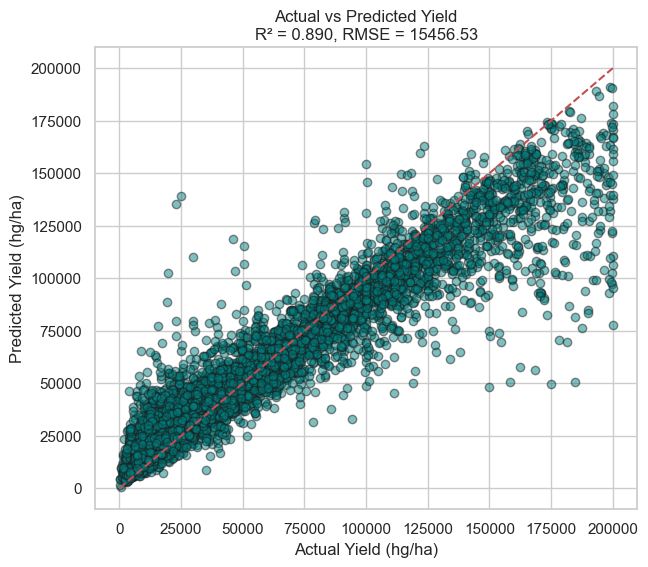

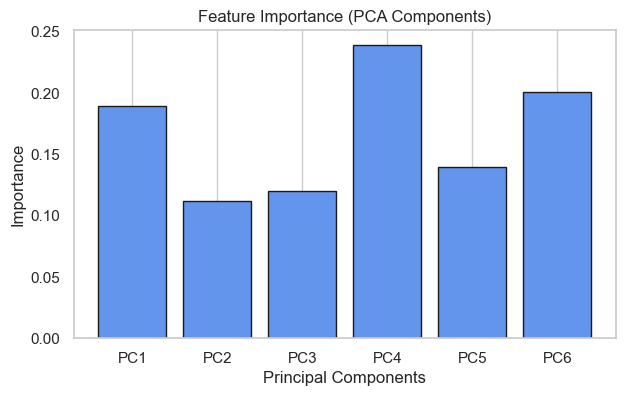

In [335]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Load Dataset ---
df = pd.read_csv("merged_crop_data.csv")

# --- Encode Categorical Columns ---
le_country = LabelEncoder()
le_item = LabelEncoder()
df['country_encoded'] = le_country.fit_transform(df['country'])
df['item_encoded'] = le_item.fit_transform(df['Item'])

# --- Feature Engineering ---
df['year_centered'] = df['Year'] - df['Year'].mean()
df['rain2'] = df['average_rain_fall_mm_per_year'] ** 2
df['pest2'] = df['pesticide_tonnes'] ** 2
df['rain_x_temp'] = df['average_rain_fall_mm_per_year'] * df['avg_temp']
df['rain_x_pest'] = df['average_rain_fall_mm_per_year'] * df['pesticide_tonnes']

# --- Select Features and Target ---
features = [
    'year_centered', 'average_rain_fall_mm_per_year', 'avg_temp', 'pesticide_tonnes',
    'rain2', 'pest2', 'rain_x_temp', 'rain_x_pest', 
    'country_encoded', 'item_encoded'
]
X = df[features].fillna(df[features].median())
y = df['yield_hg/ha']

# --- Standardization (except categorical) ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- PCA (retain 95% variance) ---
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# --- Random Forest with Hyperparameter Tuning ---
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='r2', verbose=0)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_

# --- Predict ---
y_pred = best_model.predict(X_test)

# --- Evaluation Metrics ---
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Best Parameters: {grid.best_params_}")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")
print(f"✅ R² Score: {r2:.3f}")

# --- Visualization ---

# 1. Predicted vs Actual
plt.figure(figsize=(7,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Yield (hg/ha)")
plt.ylabel("Predicted Yield (hg/ha)")
plt.title(f"Actual vs Predicted Yield\nR² = {r2:.3f}, RMSE = {rmse:.2f}")
plt.grid(True)
plt.show()

# 2. PCA Feature Importance
importances = best_model.feature_importances_
components = [f'PC{i+1}' for i in range(pca.n_components_)]

plt.figure(figsize=(7,4))
plt.bar(components, importances, color='cornflowerblue', edgecolor='k')
plt.title("Feature Importance (PCA Components)")
plt.xlabel("Principal Components")
plt.ylabel("Importance")
plt.grid(axis='y')
plt.show()


The PCA importance graph shows that PC4, PC1, and PC6 are the most influential components in predicting crop yield, together contributing more than 60% of the model’s decision power.
This indicates that both regional (country/crop) and environmental (rainfall, pesticide, temperature) factors play a major role in yield variation.

Components PC2–PC5 capture smaller yet meaningful variations, representing climatic balance and crop-type differences.

Overall, PCA successfully extracted the key underlying patterns in the dataset, helping the Random Forest model achieve high predictive accuracy (R² = 0.89).

In [336]:
def predict_yield(new_data: pd.DataFrame):
    """
    new_data must have columns:
    ['Year', 'average_rain_fall_mm_per_year', 'avg_temp', 'pesticide_tonnes', 
     'country', 'Item']
    """
    # Load saved components
    import joblib
    scaler = joblib.load("scaler.pkl")
    pca = joblib.load("pca.pkl")
    le_country = joblib.load("country_encoder.pkl")
    le_item = joblib.load("item_encoder.pkl")
    model = joblib.load("yield_prediction_model.pkl")

    # --- Encode + Engineer features ---
    new_data['country_encoded'] = new_data['country'].apply(
        lambda x: le_country.transform([x])[0] if x in le_country.classes_ else -1
    )
    new_data['item_encoded'] = new_data['Item'].apply(
        lambda x: le_item.transform([x])[0] if x in le_item.classes_ else -1
    )
    new_data['year_centered'] = new_data['Year'] - df['Year'].mean()
    new_data['rain2'] = new_data['average_rain_fall_mm_per_year'] ** 2
    new_data['pest2'] = new_data['pesticide_tonnes'] ** 2
    new_data['rain_x_temp'] = new_data['average_rain_fall_mm_per_year'] * new_data['avg_temp']
    new_data['rain_x_pest'] = new_data['average_rain_fall_mm_per_year'] * new_data['pesticide_tonnes']

    # --- Select & Transform ---
    features = [
        'year_centered', 'average_rain_fall_mm_per_year', 'avg_temp',
        'pesticide_tonnes', 'rain2', 'pest2', 'rain_x_temp', 'rain_x_pest',
        'country_encoded', 'item_encoded'
    ]
    X_new = scaler.transform(new_data[features])
    X_new_pca = pca.transform(X_new)

    # --- Predict ---
    pred = model.predict(X_new_pca)
    return pred


In [337]:
future_data = pd.DataFrame({
    'Year': [2026, 2027],
    'average_rain_fall_mm_per_year': [420, 380],
    'avg_temp': [25.5, 24.0],
    'pesticide_tonnes': [2000, 1700],
    'country': ['India', 'Brazil'],
    'Item': ['Maize', 'Wheat']
})

pred_yield = predict_yield(future_data)
future_data['Predicted_Yield_hg/ha'] = pred_yield
print(future_data['Predicted_Yield_hg/ha'])

0    62411.236667
1    53644.660000
Name: Predicted_Yield_hg/ha, dtype: float64


## **EXPLORATORY DATA ANALYSIS**

#### **Setup: load data & common imports**

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 200)
sns.set_theme(style='whitegrid')
df2 = pd.read_csv('merged_crop_data.csv')
df2.head()

,country,Item,Year,yield_hg/ha,average_rain_fall_mm_per_year,avg_temp,pesticide_tonnes
0,Afghanistan,Maize,1961,14000.0,327.0,14.23,1670.0
1,Afghanistan,Maize,1962,14000.0,327.0,14.10,1670.0
2,Afghanistan,Maize,1963,14260.0,327.0,15.01,1670.0
3,Afghanistan,Maize,1964,14257.0,327.0,13.73,1670.0
4,Afghanistan,Maize,1965,14400.0,327.0,13.90,1670.0


#### **Basic structure & info**

In [339]:
print("Shape:", df2.shape)
print("\nColumns and types:\n", df2.dtypes)
print("\nNon-null counts:")
display(df2.info())

Shape: (42578, 7)

Columns and types:
 country                           object
Item                              object
Year                               int64
yield_hg/ha                      float64
average_rain_fall_mm_per_year    float64
avg_temp                         float64
pesticide_tonnes                 float64
dtype: object

Non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42578 entries, 0 to 42577
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        42578 non-null  object 
 1   Item                           42578 non-null  object 
 2   Year                           42578 non-null  int64  
 3   yield_hg/ha                    42578 non-null  float64
 4   average_rain_fall_mm_per_year  42578 non-null  float64
 5   avg_temp                       42578 non-null  float64
 6   pesticide_tonnes               42578 non-null  fl

None

#### **Summary Statistics**

In [340]:
for col in ['country', 'Item', 'Year']:
    print(f"\n{col} -> unique: {df2[col].nunique()}")
    print(df2[col].value_counts().head(10))


country -> unique: 198
country
Nigeria     560
Cameroon    528
Rwanda      522
Peru        504
Burundi     504
Colombia    503
Kenya       499
Uganda      499
Brazil      490
Ecuador     486
Name: count, dtype: int64

Item -> unique: 10
Item
Maize                   6818
Wheat                   5308
Rice, paddy             5221
Potatoes                4765
Sorghum                 4585
Sweet potatoes          4318
Cassava                 3970
Soybeans                3591
Yams                    2114
Plantains and others    1888
Name: count, dtype: int64

Year -> unique: 56
Year
1995    982
1994    981
1998    980
1997    980
2001    975
2000    974
1993    973
1999    971
1996    970
2006    967
Name: count, dtype: int64


#### **Skewness and Kurtosis Analysis**

In [341]:
numerical_cols = ['yield_hg/ha', 'average_rain_fall_mm_per_year', 'avg_temp', 'pesticide_tonnes']
print("SKEWNESS AND KURTOSIS ANALYSIS")

for col in numerical_cols:
    skewness = skew(merged_clean[col])
    kurt = kurtosis(merged_clean[col])
    
    print(f"\n{col}:")
    print(f"  Skewness: {skewness:.3f}", end="")
    if abs(skewness) < 0.5:
        print(" (Fairly symmetric)")
    elif abs(skewness) < 1:
        print(" (Moderately skewed)")
    else:
        print(" (Highly skewed)")
    
    print(f"  Kurtosis: {kurt:.3f}", end="")
    if abs(kurt) < 0.5:
        print(" (Normal-like tails)")
    elif kurt > 0:
        print(" (Heavy tails - outliers present)")
    else:
        print(" (Light tails)")

SKEWNESS AND KURTOSIS ANALYSIS

yield_hg/ha:
  Skewness: 1.242 (Highly skewed)
  Kurtosis: 0.725 (Heavy tails - outliers present)

average_rain_fall_mm_per_year:
  Skewness: 0.602 (Moderately skewed)
  Kurtosis: -0.176 (Normal-like tails)

avg_temp:
  Skewness: -0.983 (Moderately skewed)
  Kurtosis: 0.703 (Heavy tails - outliers present)

pesticide_tonnes:
  Skewness: 13.306 (Highly skewed)
  Kurtosis: 199.306 (Heavy tails - outliers present)


#### **Box Plots for Outlier Detection**

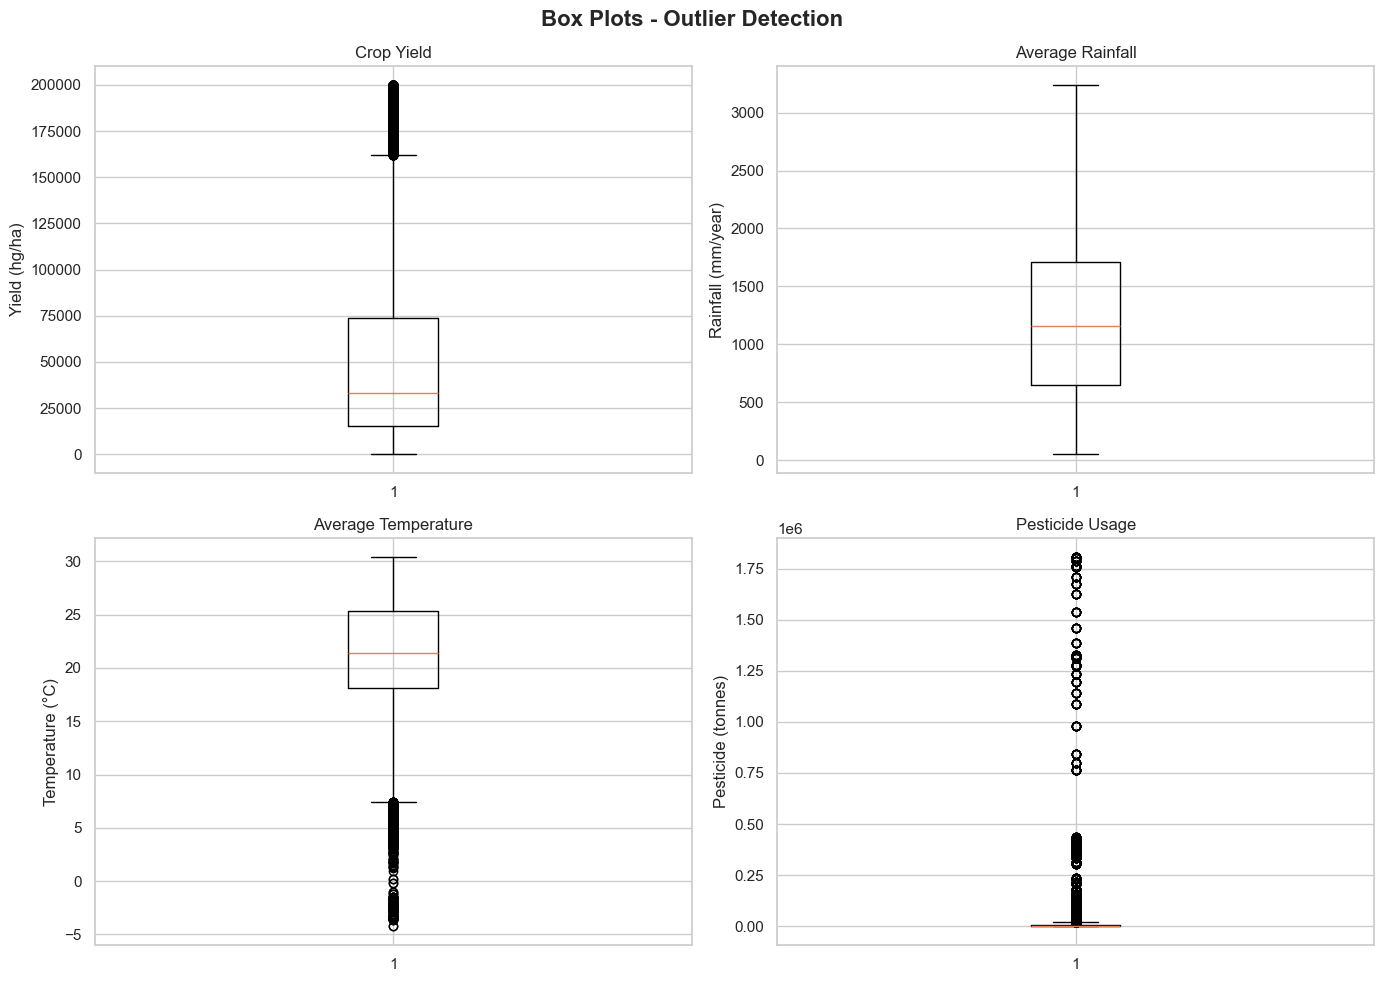

In [342]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Box Plots - Outlier Detection', fontsize=16, fontweight='bold')

axes[0, 0].boxplot(merged_clean['yield_hg/ha'], vert=True)
axes[0, 0].set_title('Crop Yield')
axes[0, 0].set_ylabel('Yield (hg/ha)')

axes[0, 1].boxplot(merged_clean['average_rain_fall_mm_per_year'], vert=True)
axes[0, 1].set_title('Average Rainfall')
axes[0, 1].set_ylabel('Rainfall (mm/year)')

axes[1, 0].boxplot(merged_clean['avg_temp'], vert=True)
axes[1, 0].set_title('Average Temperature')
axes[1, 0].set_ylabel('Temperature (°C)')

axes[1, 1].boxplot(merged_clean['pesticide_tonnes'], vert=True)
axes[1, 1].set_title('Pesticide Usage')
axes[1, 1].set_ylabel('Pesticide (tonnes)')

plt.tight_layout()
plt.show()

### **Pesticide Log Transformation**

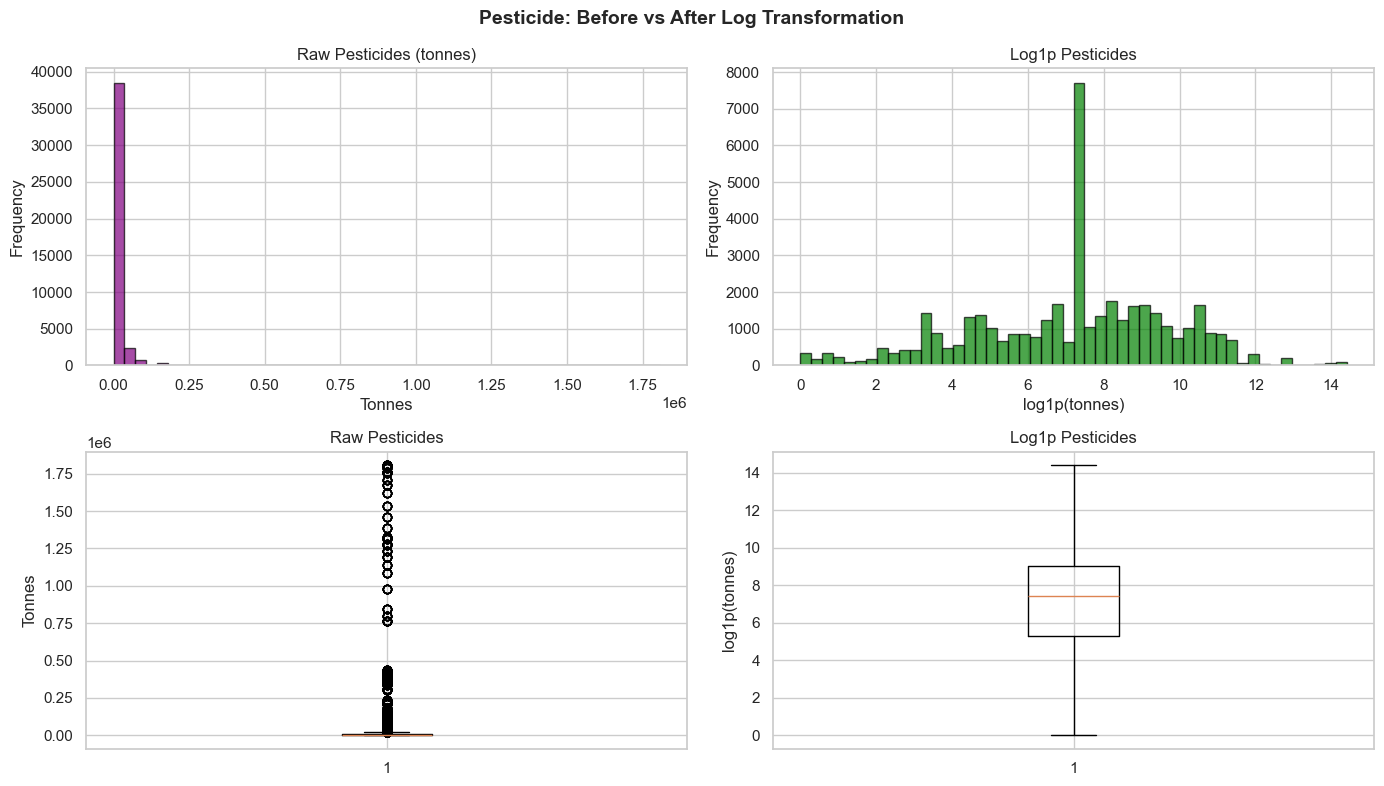

In [343]:
merged_clean['pesticide_log1p'] = np.log1p(merged_clean['pesticide_tonnes'])

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
fig.suptitle('Pesticide: Before vs After Log Transformation', fontsize=14, fontweight='bold')

axes[0, 0].hist(merged_clean['pesticide_tonnes'], bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Raw Pesticides (tonnes)')
axes[0, 0].set_xlabel('Tonnes')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(merged_clean['pesticide_log1p'], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Log1p Pesticides')
axes[0, 1].set_xlabel('log1p(tonnes)')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].boxplot(merged_clean['pesticide_tonnes'], vert=True)
axes[1, 0].set_title('Raw Pesticides')
axes[1, 0].set_ylabel('Tonnes')

axes[1, 1].boxplot(merged_clean['pesticide_log1p'], vert=True)
axes[1, 1].set_title('Log1p Pesticides')
axes[1, 1].set_ylabel('log1p(tonnes)')

plt.tight_layout()
plt.show()

#### Key Observations

- **Raw pesticide** is extremely right-skewed (skew >3) with most values clustered near zero and a long tail extending to 300k+ tonnes.
- **Log1p transformation** produces a much more symmetric distribution (near-normal shape) suitable for correlation analysis and linear modeling.
- **Outliers reduced**: boxplot shows the log-transformed version has fewer extreme outliers compared to raw scale.
- **Use case**: prefer `pesticide_log1p` for correlation heatmaps, regression models, and bivariate analysis to avoid scale-dominated effects from large countries.

#### **Distribution Plots**

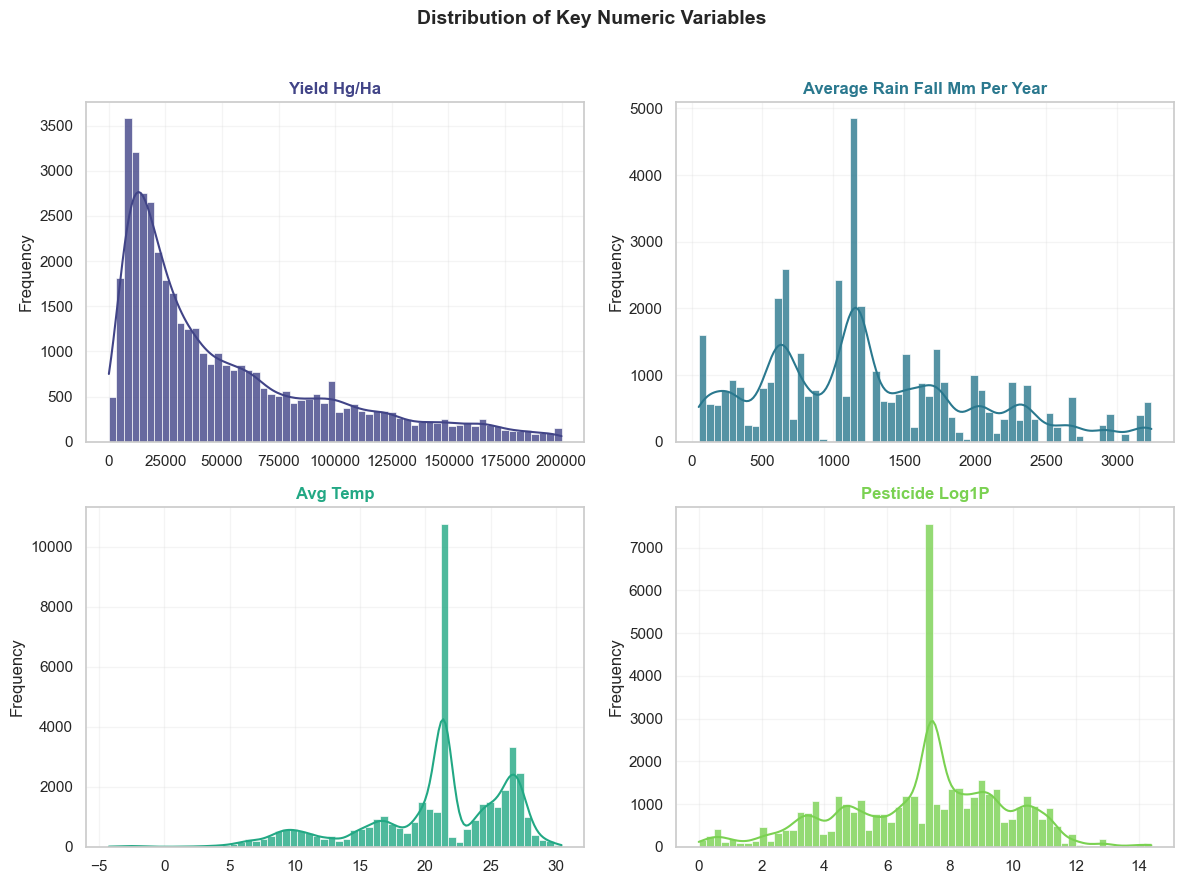

In [344]:
numeric = ['yield_hg/ha','average_rain_fall_mm_per_year','avg_temp','pesticide_log1p']
colors = sns.color_palette('viridis', n_colors=len(numeric))

plt.figure(figsize=(12,9))

for i, col in enumerate(numeric, 1):
    plt.subplot(2, 2, i)
    sns.histplot(
        merged_clean[col].dropna(),
        kde=True,
        bins=60,
        color=colors[i-1],
        alpha=0.8
    )
    plt.title(col.replace('_', ' ').title(), fontsize=12, fontweight='bold', color=colors[i-1])
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.grid(alpha=0.2)

plt.suptitle('Distribution of Key Numeric Variables', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Yield, rainfall, and pesticide usage are right skewed, most observations are low with few extremely high values. Temperature is roughly bell-shaped, suggesting more consistent climatic patterns compared to yield variability.

#### **Log-transform check**

In [345]:
cols = ['yield_hg/ha','pesticide_tonnes']
for c in cols:
    print(c, "skew:", round(df2[c].dropna().skew(),3), 
          " | log1p skew:", round(np.log1p(df2[c].dropna()).skew(),3))

yield_hg/ha skew: 1.242  | log1p skew: -0.25
pesticide_tonnes skew: 13.306  | log1p skew: -0.38


The log transformation substantially reduces skewness for yield and pesticide usage, improving normality and helping regression or PCA performance. It confirms that these features contain extreme outliers.

#### **Correlation matrix + heatmap**

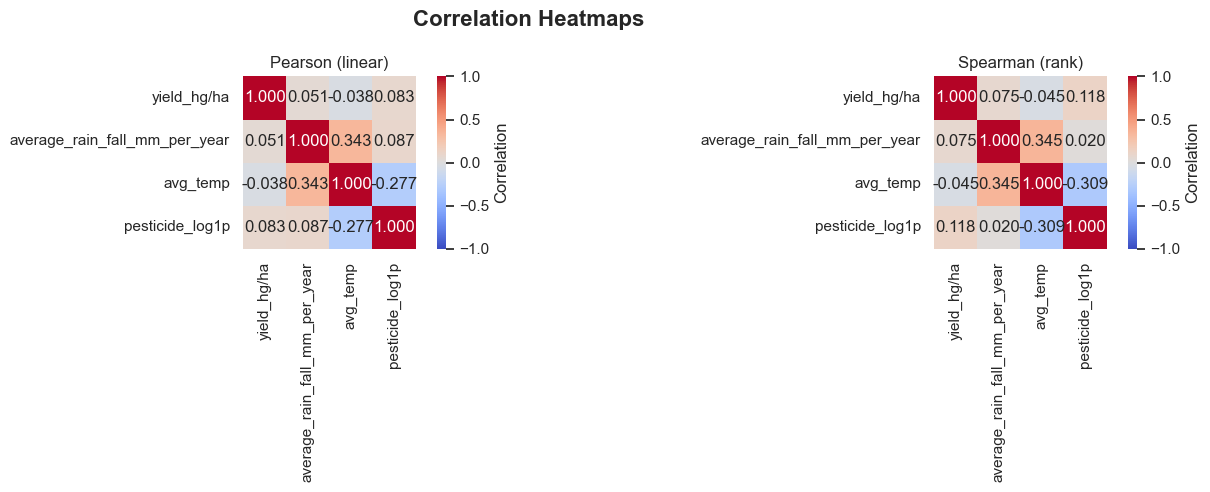

In [346]:
cols = ['yield_hg/ha', 'average_rain_fall_mm_per_year', 'avg_temp', 'pesticide_log1p']
corr_pearson = merged_clean[cols].corr(method='pearson')
corr_spearman = merged_clean[cols].corr(method='spearman')

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Correlation Heatmaps', fontsize=16, fontweight='bold')

sns.heatmap(corr_pearson, annot=True, fmt='.3f', cmap='coolwarm', vmin=-1, vmax=1, square=True, ax=axes[0], cbar_kws={'label': 'Correlation'})
axes[0].set_title('Pearson (linear)')

sns.heatmap(corr_spearman, annot=True, fmt='.3f', cmap='coolwarm', vmin=-1, vmax=1, square=True, ax=axes[1], cbar_kws={'label': 'Correlation'})
axes[1].set_title('Spearman (rank)')

plt.tight_layout()
plt.show()

No strong correlations

#### **Pairwise scatter (sampled) for heavy data**

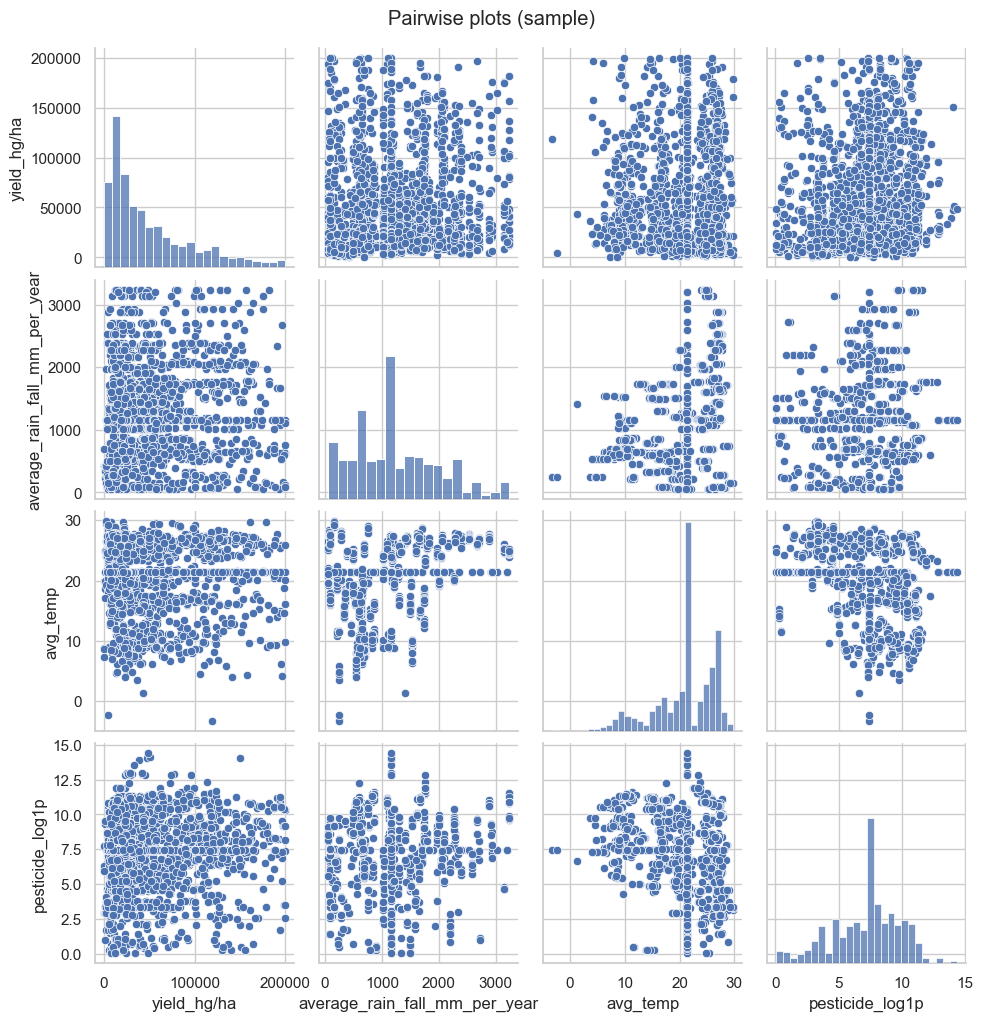

In [347]:
sample = merged_clean.sample(n=2000, random_state=42) if len(df)>2000 else df
sns.pairplot(sample[['yield_hg/ha','average_rain_fall_mm_per_year','avg_temp','pesticide_log1p']])
plt.suptitle("Pairwise plots (sample)", y=1.02)
plt.show()

### **Line Plot for Yearwise Trend**

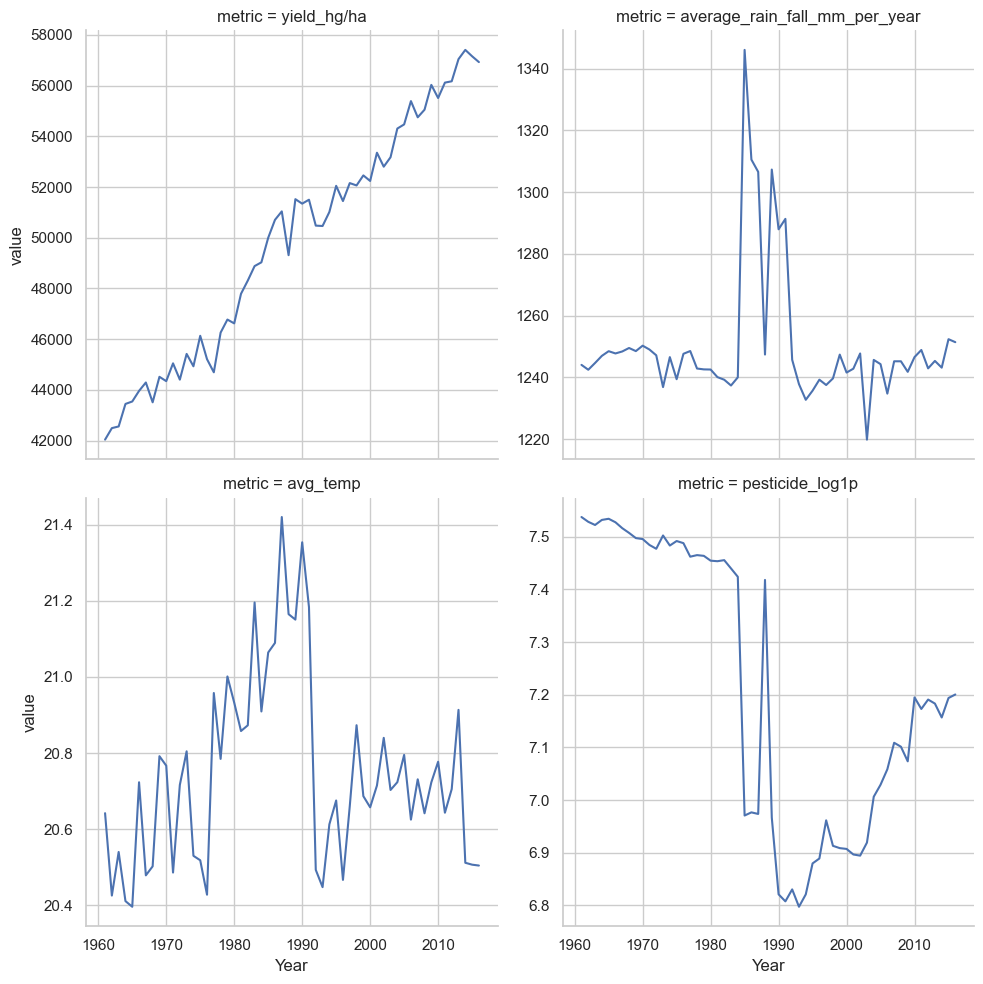

In [348]:
gy = merged_clean.groupby('Year')[cols].mean().reset_index()
long = gy.melt('Year', var_name='metric', value_name='value')
sns.relplot(data=long, x='Year', y='value', kind='line', col='metric', col_wrap=2, facet_kws={'sharey':False})

What this plot shows:

- Each panel plots the yearly mean of one variable (yield, rainfall, temperature, pesticide_log1p) across the dataset.
- The lines show how the global average for each variable changed year-to-year.

Inferences:

- Yield: steady upward trend → overall productivity has improved over time (technology, inputs, practices).
- Rainfall: Noticeable peak around 1990, then declines back toward long-term levels; overall large inter-annual variability.
- Temperature: slight upward drift → possible warming signal that may affect crops differently by region.
- Pesticide_log1p: rises, then dips and recovers → usage patterns changed over time (policy/market/tech); effects on yield may be delayed or non-linear.

#### **Top countries by mean yield and bar plot**

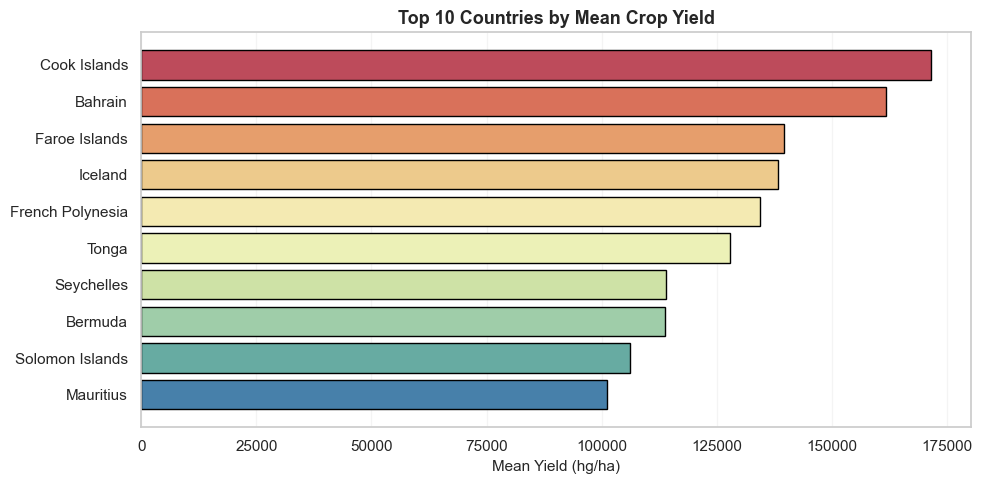

In [349]:
top_countries = df2.groupby('country')['yield_hg/ha'].mean().sort_values(ascending=False).head(10)
colors = sns.color_palette('Spectral', n_colors=len(top_countries))
country_colors = dict(zip(top_countries.index, colors))

plt.figure(figsize=(10,5))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index,
    palette=colors,
    edgecolor='black',
    hue=top_countries.index,
    legend = False
)

plt.xlabel('Mean Yield (hg/ha)', fontsize=11)
plt.ylabel('')
plt.title('Top 10 Countries by Mean Crop Yield', fontsize=13, fontweight='bold')
plt.grid(axis='x', alpha=0.2)

for i, country in enumerate(top_countries.index):
    plt.bar(0, 0, color=colors[i], label=country)

plt.tight_layout()
plt.show()

#### **Yield vs Rain/Temp/Pesticide scatter with smoothing**

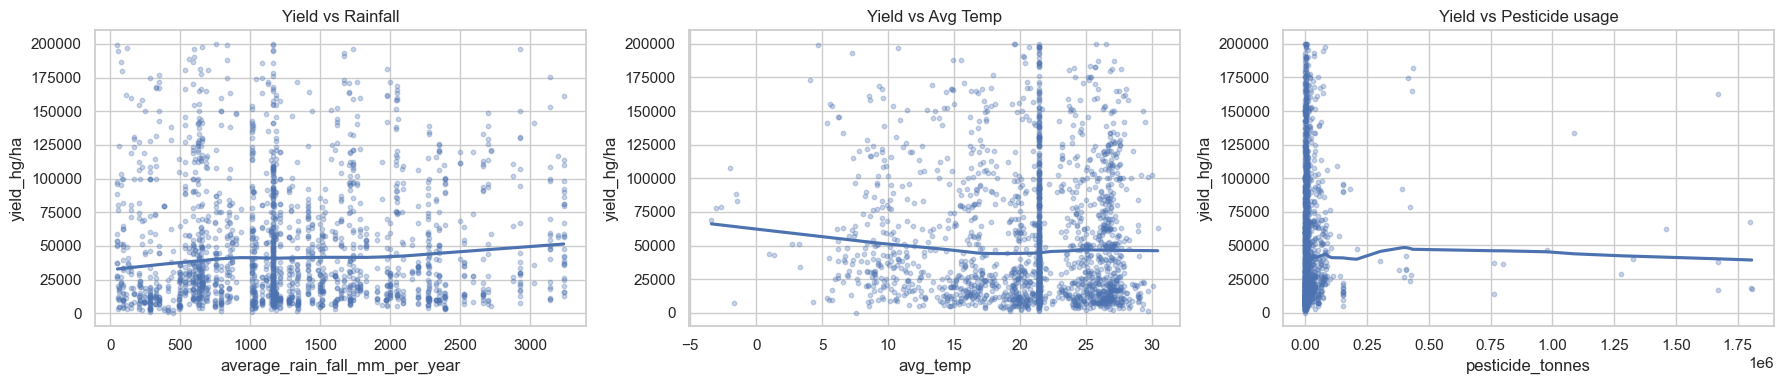

In [350]:
fig, axes = plt.subplots(1,3, figsize=(18,4))
sns.regplot(x='average_rain_fall_mm_per_year', y='yield_hg/ha', data=df2.sample(2000, random_state=1),
            lowess=True, ax=axes[0], scatter_kws={'s':10, 'alpha':0.3})
axes[0].set_title('Yield vs Rainfall')

sns.regplot(x='avg_temp', y='yield_hg/ha', data=df2.sample(2000, random_state=2),
            lowess=True, ax=axes[1], scatter_kws={'s':10, 'alpha':0.3})
axes[1].set_title('Yield vs Avg Temp')

sns.regplot(x='pesticide_tonnes', y='yield_hg/ha', data=df2.sample(2000, random_state=3),
            lowess=True, ax=axes[2], scatter_kws={'s':10, 'alpha':0.3})
axes[2].set_title('Yield vs Pesticide usage')

plt.tight_layout()
plt.show()

#### **Country-wise time trends (select few countries)**

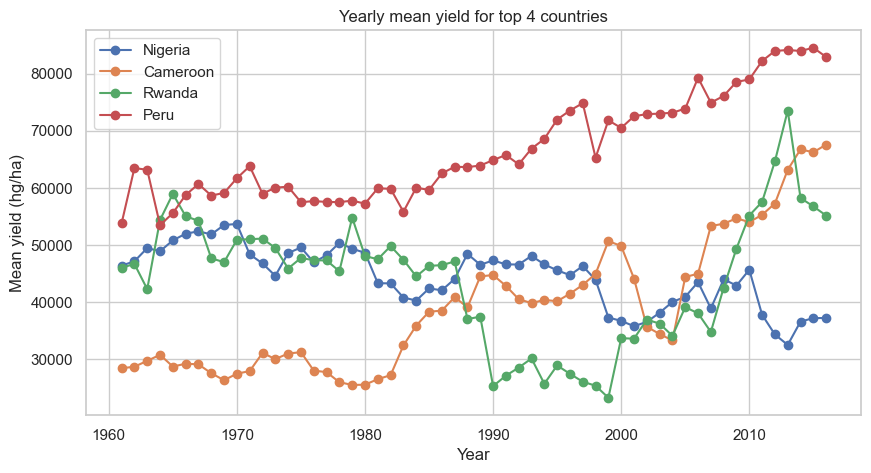

In [351]:
countries = df2['country'].value_counts().head(4).index.tolist()  # top 4 countries
plt.figure(figsize=(10,5))
for c in countries:
    y = df2[df2['country']==c].groupby('Year')['yield_hg/ha'].mean()
    plt.plot(y.index, y.values, marker='o', label=c)
plt.legend()
plt.title('Yearly mean yield for top 4 countries')
plt.xlabel('Year'); plt.ylabel('Mean yield (hg/ha)')
plt.show()

#### **Grouped aggregations: country+crop summary**

In [352]:
agg = df2.groupby(['country','Item'])['yield_hg/ha'].agg(['mean','median','std','count']).reset_index()
display(agg.sort_values('count', ascending=False).head(20))

,country,Item,mean,median,std,count
1093,Zimbabwe,Wheat,40351.464286,38924.5,13931.682227,56
0,Afghanistan,Maize,17194.607143,16580.5,3837.779607,56
1,Afghanistan,Potatoes,136327.964286,144009.5,29804.842705,56
2,Afghanistan,"Rice, paddy",22194.142857,20547.5,4998.284449,56
3,Afghanistan,Wheat,12729.982143,12101.0,3531.880419,56
4,Albania,Maize,35705.392857,35870.5,16326.333481,56
1044,Uruguay,Wheat,18663.357143,16076.5,8944.010257,56
1043,Uruguay,Sweet potatoes,67910.517857,57390.0,25149.817108,56
1042,Uruguay,Soybeans,15579.767857,15177.0,5275.783592,56
1041,Uruguay,Sorghum,25816.142857,26525.0,11932.184670,56


#### **Scatter Plots: Yield vs Rainfall / Temperature / Pesticide (Color-coded by Crop)**

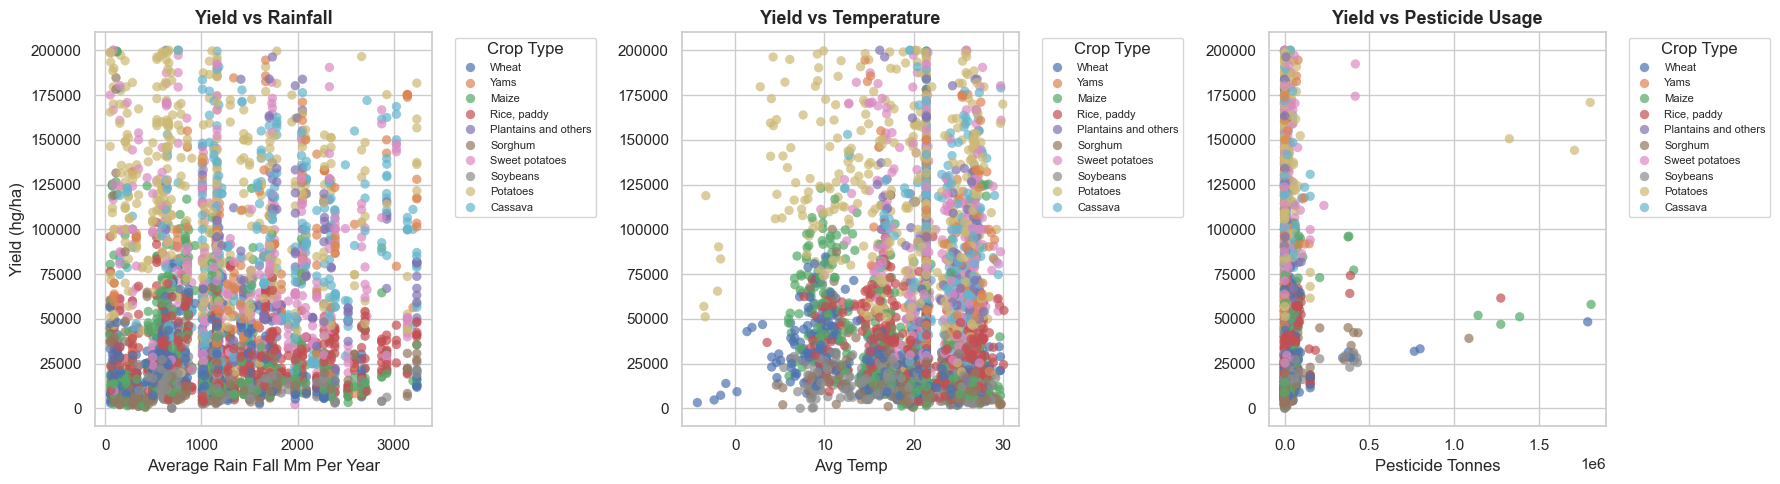

In [354]:
import matplotlib.pyplot as plt
import seaborn as sns

sample = df.sample(n=4000, random_state=42) if len(df) > 4000 else df

x_vars = ['average_rain_fall_mm_per_year', 'avg_temp', 'pesticide_tonnes']
titles = ['Yield vs Rainfall', 'Yield vs Temperature', 'Yield vs Pesticide Usage']

plt.figure(figsize=(18, 5))

for i, x in enumerate(x_vars):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(
        data=sample,
        x=x,
        y='yield_hg/ha',
        hue='Item',
        alpha=0.7,
        s=45,
        edgecolor='none'
    )
    plt.title(titles[i], fontsize=13, fontweight='bold')
    plt.xlabel(x.replace('_', ' ').title())
    plt.ylabel('Yield (hg/ha)' if i == 0 else '')
    plt.legend(title='Crop Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

plt.tight_layout()
plt.show()

#### **Bar Plot — Average yield per crop**

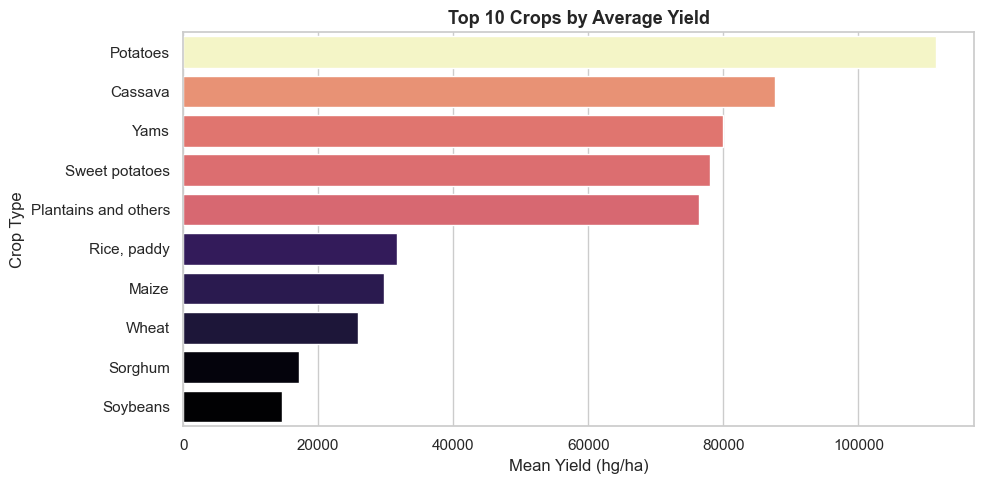

In [355]:
plt.figure(figsize=(10,5))
crop_means = df.groupby('Item')['yield_hg/ha'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=crop_means.values, y=crop_means.index, palette='magma', hue = crop_means.values, legend = False)
plt.title('Top 10 Crops by Average Yield', fontsize=13, fontweight='bold')
plt.xlabel('Mean Yield (hg/ha)')
plt.ylabel('Crop Type')
plt.tight_layout()
plt.show()

#### **Crop share pie chart — Data composition**

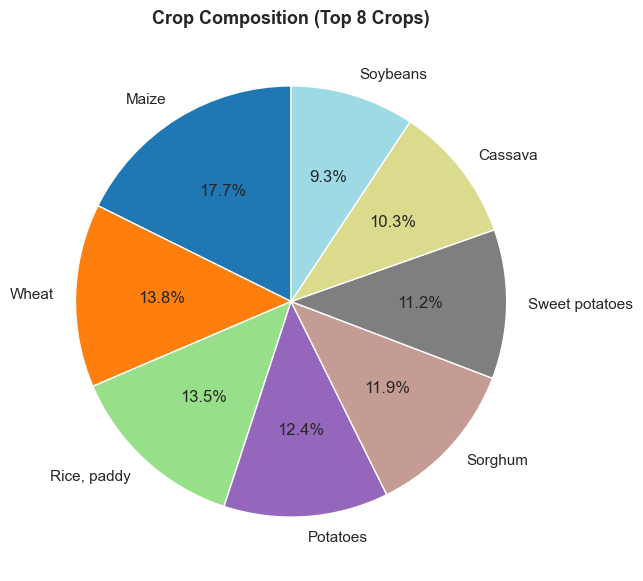

In [356]:
plt.figure(figsize=(7,7))
df['Item'].value_counts().head(8).plot.pie(autopct='%1.1f%%', startangle=90, cmap='tab20')
plt.ylabel('')
plt.title('Crop Composition (Top 8 Crops)', fontsize=13, fontweight='bold')
plt.show()

#### **Yield Trends for Major Crops**

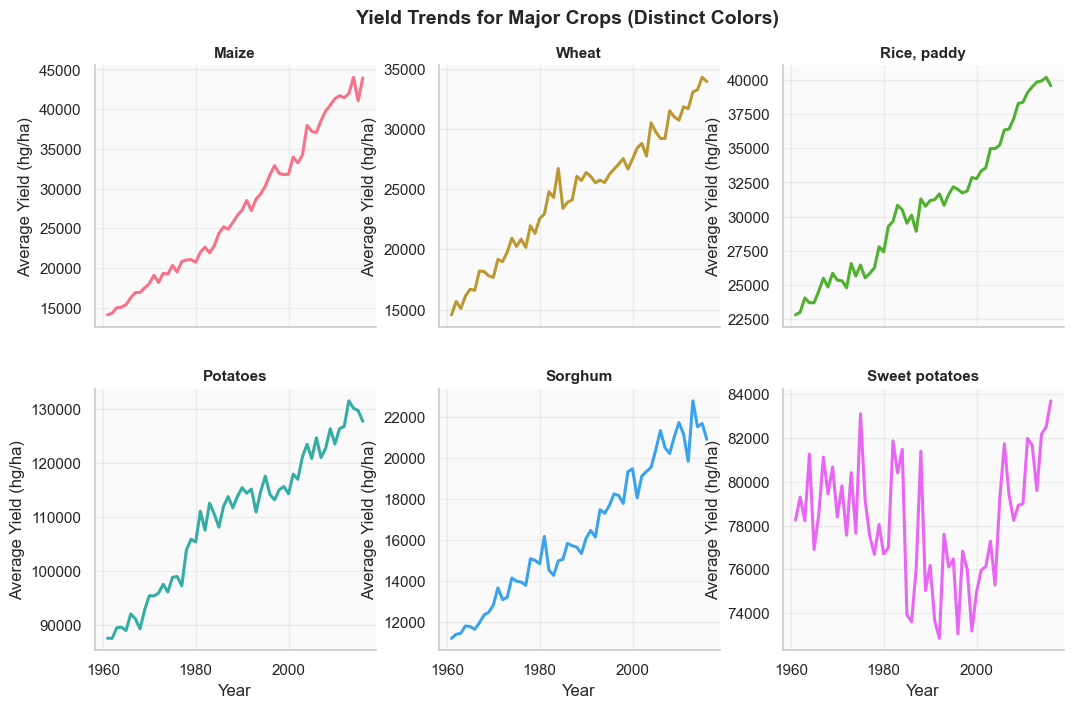

In [357]:
top_crops = df2['Item'].value_counts().head(6).index
palette = sns.color_palette('husl', n_colors=len(top_crops))
color_map = dict(zip(top_crops, palette))

g = sns.FacetGrid(
    df2[df2['Item'].isin(top_crops)],
    col='Item',
    col_wrap=3,
    height=3.5,
    sharey=False
)

for ax, crop in zip(g.axes.flatten(), top_crops):
    sub_df = df2[df2['Item'] == crop]
    sns.lineplot(
        data=sub_df.groupby('Year')['yield_hg/ha'].mean().reset_index(),
        x='Year',
        y='yield_hg/ha',
        color=color_map[crop],
        linewidth=2.2,
        ax=ax
    )
    ax.set_title(crop, fontsize=11, fontweight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Yield (hg/ha)')
    ax.grid(alpha=0.3)
    ax.set_facecolor('#fafafa')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Yield Trends for Major Crops (Distinct Colors)', fontsize=14, fontweight='bold')
plt.show()

## **HYPOTHESIS TESTING**

### **1. Two-sample t-test: Does average yield differ between two countries?**
Hypothesis
- H₀ (Null): There is no significant difference in mean yield between India and China.
- H₁ (Alt): There is a significant difference in mean yield between India and China.

In [358]:
from scipy.stats import ttest_ind

country1, country2 = 'India', 'China'
y1 = df[df['country'] == country1]['yield_hg/ha'].dropna()
y2 = df[df['country'] == country2]['yield_hg/ha'].dropna()

t_stat, p_val = ttest_ind(y1, y2, equal_var=False)
print(f"T-statistic = {t_stat:.4f},  p-value = {p_val:.6f}")

if p_val < 0.05:
    print(f"✅ Reject H₀: Yield differs significantly between {country1} and {country2}")
else:
    print(f"❌ Fail to Reject H₀: No significant yield difference between {country1} and {country2}")

T-statistic = -5.5255,  p-value = 0.000000
✅ Reject H₀: Yield differs significantly between India and China


### **2. One-way ANOVA: Does yield vary across multiple crops?**
Hypothesis
- H₀: All crop types have the same mean yield.
- H₁: At least one crop has a significantly different mean yield.

In [359]:
from scipy.stats import f_oneway

top_items = df['Item'].value_counts().head(5).index
samples = [df[df['Item']==i]['yield_hg/ha'].dropna() for i in top_items]

f_stat, p_val = f_oneway(*samples)
print(f"F-statistic = {f_stat:.4f},  p-value = {p_val:.6f}")

if p_val < 0.05:
    print("✅ Reject H₀: Yield differs significantly among crops.")
else:
    print("❌ Fail to Reject H₀: No significant yield difference among crops.")

F-statistic = 9417.0788,  p-value = 0.000000
✅ Reject H₀: Yield differs significantly among crops.


### **3.Pearson correlation test: Is rainfall correlated with yield?**
Hypothesis
- H₀: There is no linear correlation between rainfall and yield.
- H₁: There is a significant linear correlation between rainfall and yield.

In [360]:
from scipy.stats import pearsonr

r, p = pearsonr(df['average_rain_fall_mm_per_year'].dropna(), df['yield_hg/ha'].dropna())
print(f"Correlation coefficient r = {r:.3f}, p-value = {p:.6f}")

if p < 0.05:
    print("✅ Significant correlation between rainfall and yield.")
else:
    print("❌ No significant correlation between rainfall and yield.")

Correlation coefficient r = 0.051, p-value = 0.000000
✅ Significant correlation between rainfall and yield.


### **4. Spearman correlation: Relationship between temperature and yield**
(Useful when data is not normally distributed.)

Hypothesis
- H₀: There is no monotonic relationship between temperature and yield.
- H₁: There is a significant monotonic relationship between temperature and yield.

In [361]:
from scipy.stats import spearmanr

rho, p = spearmanr(df['avg_temp'], df['yield_hg/ha'])
print(f"Spearman correlation = {rho:.3f}, p-value = {p:.6f}")

if p < 0.05:
    print("✅ Significant monotonic relationship between temperature and yield.")
else:
    print("❌ No significant monotonic relationship between temperature and yield.")

Spearman correlation = -0.045, p-value = 0.000000
✅ Significant monotonic relationship between temperature and yield.


#### **5. Linear regression t-test: Does pesticide usage affect yield?**

(Testing significance of slope)

Hypothesis
- H₀: Pesticide usage has no effect on yield (slope = 0).
- H₁: Pesticide usage significantly affects yield.

In [362]:
import statsmodels.api as sm

X = sm.add_constant(df['pesticide_tonnes'])
y = df['yield_hg/ha']

model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())

p_val = model.pvalues['pesticide_tonnes']
if p_val < 0.05:
    print("✅ Reject H₀: Pesticide usage significantly affects yield.")
else:
    print("❌ Fail to Reject H₀: No significant effect of pesticide usage on yield.")

                            OLS Regression Results                            
Dep. Variable:            yield_hg/ha   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     129.6
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           5.64e-30
Time:                        18:28:27   Log-Likelihood:            -5.1772e+05
No. Observations:               42578   AIC:                         1.035e+06
Df Residuals:                   42576   BIC:                         1.035e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             5.042e+04    227.500  

#### **6. Chi-square test: Independence of crop type and country**
Hypothesis
- H₀: Crop type and country are independent.
- H₁: Crop type and country are dependent (association exists).

In [363]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['country'], df['Item'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(f"Chi² = {chi2:.3f}, df = {dof}, p-value = {p:.6f}")
if p < 0.05:
    print("✅ Reject H₀: Crop type and country are associated.")
else:
    print("❌ Fail to Reject H₀: No significant association between crop type and country.")

Chi² = 31599.462, df = 1773, p-value = 0.000000
✅ Reject H₀: Crop type and country are associated.


#### **7. Shapiro-Wilk test: Normality test on yield**
Hypothesis
- H₀: Yield data is normally distributed.
- H₁: Yield data is not normally distributed.

In [364]:
from scipy.stats import shapiro

sample = df['yield_hg/ha'].dropna().sample(5000, random_state=42)
stat, p = shapiro(sample)
print(f"Shapiro-Wilk statistic = {stat:.4f}, p-value = {p:.6f}")

if p < 0.05:
    print("❌ Reject H₀: Yield is not normally distributed.")
else:
    print("✅ Fail to Reject H₀: Yield appears normally distributed.")

Shapiro-Wilk statistic = 0.8511, p-value = 0.000000
❌ Reject H₀: Yield is not normally distributed.


## **Yield Trend Analysis — Historical + Future (Top 5 Countries)**

✅ Random Forest model trained successfully!

🌾 Top 5 countries: ['Cook Islands', 'Bahrain', 'Faroe Islands', 'Iceland', 'French Polynesia']


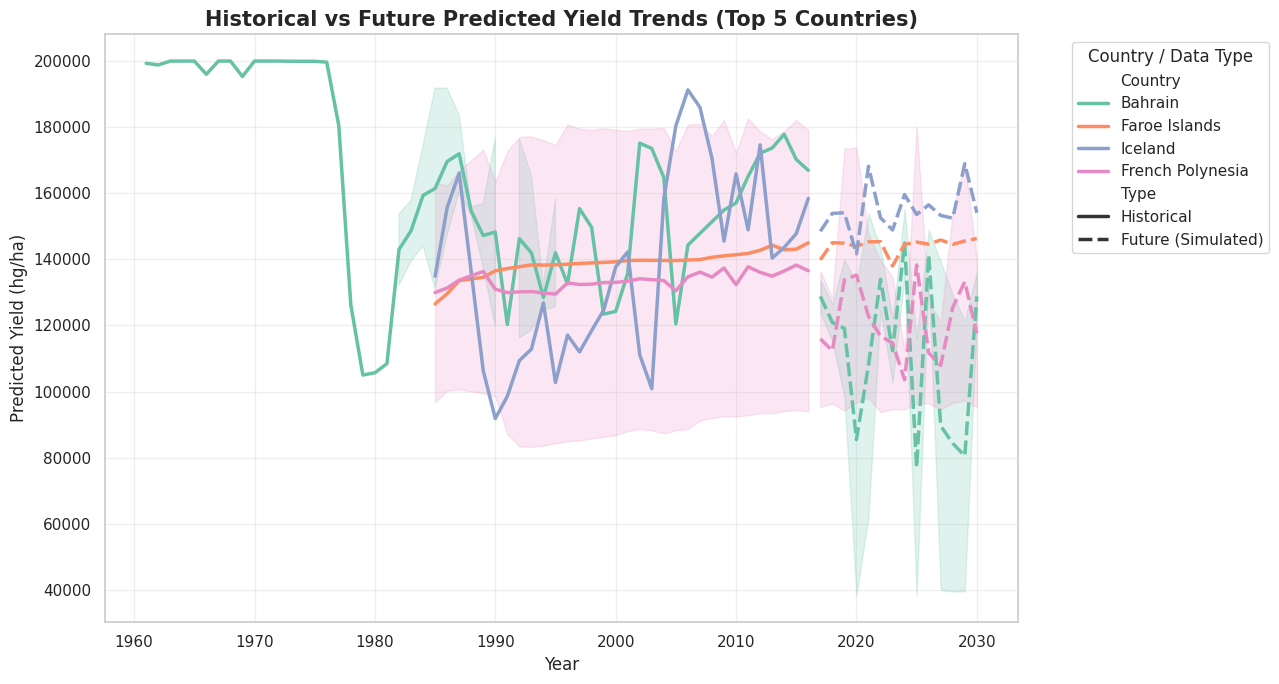


✅ Combined historical and future yield trends plotted successfully!


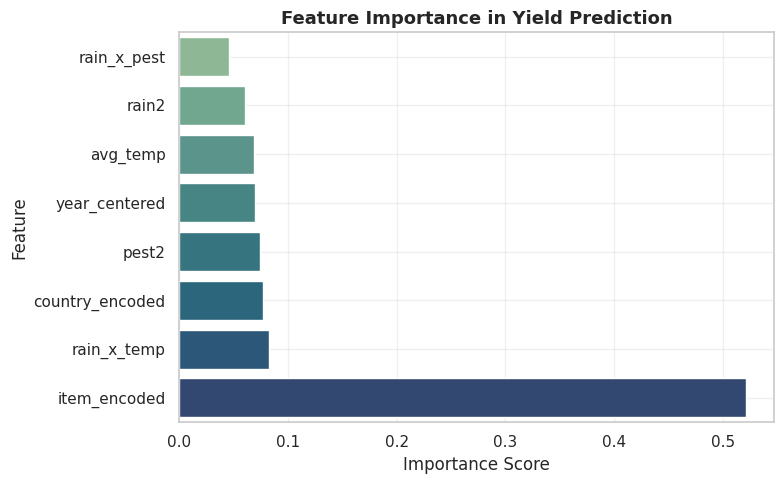

In [369]:
from sklearn.ensemble import RandomForestRegressor

plt.rcParams['font.family'] = 'DejaVu Sans'   

# --- Step 1: Train the Random Forest model ---
features = [
    'year_centered','rain_x_pest','pest2','rain_x_temp','rain2',
    'avg_temp','country_encoded','item_encoded'
]

X = df[features]
y = df['yield_hg/ha']

rf_best = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)
rf_best.fit(X, y)
print("✅ Random Forest model trained successfully!")

# --- Step 2: Get top 5 countries ---
top5 = df.groupby('country')['yield_hg/ha'].mean().nlargest(5).index
print("\n🌾 Top 5 countries:", list(top5))

# --- Step 3: Aggregate real historical data ---
agg = df.groupby(['country','Item','Year']).agg({
    'average_rain_fall_mm_per_year':'mean',
    'avg_temp':'mean',
    'pesticide_tonnes':'mean',
    'yield_hg/ha':'mean'
}).reset_index()

results = []

# --- Step 4: Predict for both historical + simulated future years ---
for c in top5:
    for crop in df[df['country'] == c]['Item'].unique():
        sub = agg[(agg['country'] == c) & (agg['Item'] == crop)].copy()
        if len(sub) < 10:
            continue
        
        # Historical trends
        sub['country_encoded'] = le_country.transform(sub['country'])
        sub['item_encoded'] = le_item.transform(sub['Item'])
        sub['year_centered'] = sub['Year'] - df['Year'].mean()
        sub['rain2'] = sub['average_rain_fall_mm_per_year'] ** 2
        sub['rain_x_temp'] = sub['average_rain_fall_mm_per_year'] * sub['avg_temp']
        sub['rain_x_pest'] = sub['average_rain_fall_mm_per_year'] * sub['pesticide_tonnes']
        sub['pest2'] = sub['pesticide_tonnes'] ** 2

        preds_hist = rf_best.predict(sub[features])

        hist = pd.DataFrame({
            'Year': sub['Year'],
            'Country': c,
            'Crop': crop,
            'Predicted_Yield_hg/ha': preds_hist,
            'Type': 'Historical'
        })
        
        # Future trend (simulation)
        mean_rain = sub['average_rain_fall_mm_per_year'].mean()
        mean_temp = sub['avg_temp'].mean()
        mean_pest = sub['pesticide_tonnes'].mean()
        future_years = np.arange(2017, 2031)

        future = pd.DataFrame({
            'Year': future_years,
            'average_rain_fall_mm_per_year': mean_rain + np.random.normal(0, 20, len(future_years)),
            'avg_temp': mean_temp + np.random.normal(0, 0.5, len(future_years)),
            'pesticide_tonnes': mean_pest + np.random.normal(0, 10, len(future_years)),
            'country': [c]*len(future_years),
            'Item': [crop]*len(future_years)
        })

        future['country_encoded'] = le_country.transform(future['country'])
        future['item_encoded'] = le_item.transform(future['Item'])
        future['year_centered'] = future['Year'] - df['Year'].mean()
        future['rain2'] = future['average_rain_fall_mm_per_year'] ** 2
        future['rain_x_temp'] = future['average_rain_fall_mm_per_year'] * future['avg_temp']
        future['rain_x_pest'] = future['average_rain_fall_mm_per_year'] * future['pesticide_tonnes']
        future['pest2'] = future['pesticide_tonnes'] ** 2

        preds_future = rf_best.predict(future[features])

        fut = pd.DataFrame({
            'Year': future['Year'],
            'Country': c,
            'Crop': crop,
            'Predicted_Yield_hg/ha': preds_future,
            'Type': 'Future (Simulated)'
        })

        results.extend([hist, fut])

# --- Step 5: Combine all results ---
trend_df = pd.concat(results, ignore_index=True)

# --- Step 6: Plot Historical + Future Yields ---
plt.figure(figsize=(13,7))
sns.lineplot(
    data=trend_df,
    x='Year', y='Predicted_Yield_hg/ha',
    hue='Country', style='Type',
    linewidth=2.5, palette='Set2'
)
plt.title("Historical vs Future Predicted Yield Trends (Top 5 Countries)", fontsize=15, fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Predicted Yield (hg/ha)")
plt.grid(alpha=0.3)
plt.legend(title='Country / Data Type', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

print("\n✅ Combined historical and future yield trends plotted successfully!")


# --- 1️⃣ Feature importance chart ---
importances = pd.Series(rf_best.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=importances.index, palette="crest", hue=importances.index, legend = False)
plt.title("Feature Importance in Yield Prediction", fontsize=13, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()